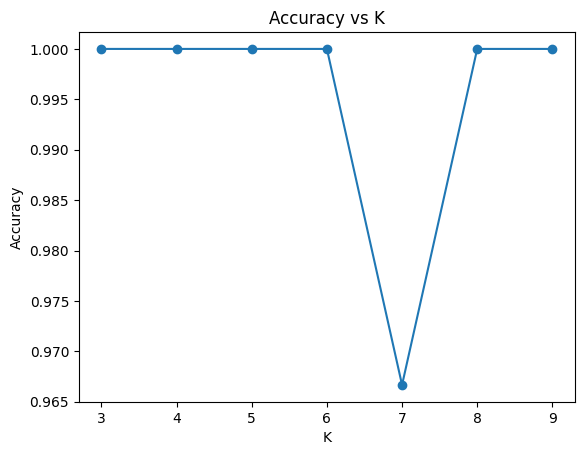

Best K: 3
Accuracy:  1.00
Precision: 1.00
Recall:    1.00
f1_score: 1.0
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


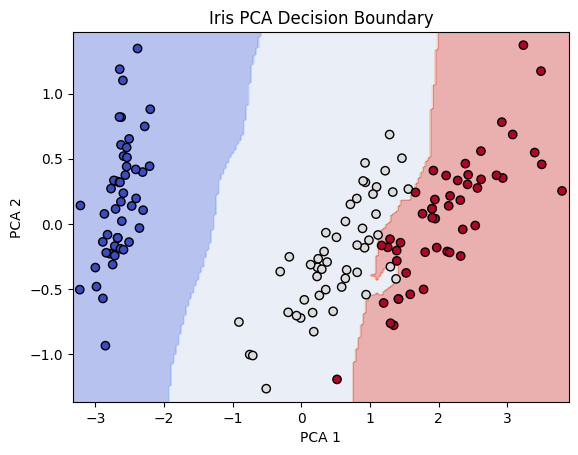

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder,StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score, confusion_matrix
from sklearn.decomposition import PCA


# Load CSV
df = pd.read_csv('iris.csv')
# Separate features (X) and target (y)
X = df.iloc[:, :-1].values   # all columns except the last
y = df.iloc[:, -1].values    # last column assumed to be the label

# Encode labels: setosa -> 0, versicolor -> 1, virginica -> 2
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
target_names = label_encoder.classes_

# Normalize
#X = MinMaxScaler().fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Accuracy vs. K
k_values = range(3, 10)
accuracies = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

# Plot accuracy vs K
#plt.figure(figsize=(8, 4))
plt.plot(k_values, accuracies, marker='o')
plt.title("Accuracy vs K")
plt.xlabel("K")
plt.ylabel("Accuracy")
#plt.grid(True)
plt.show()

# Final model
best_k = k_values[np.argmax(accuracies)]
model = KNeighborsClassifier(n_neighbors=best_k).fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f"Best K: {best_k}")
print(f"Accuracy:  {accuracy_score(y_test, y_pred):.2f}")
print(f"Precision: {precision_score(y_test, y_pred, average='macro'):.2f}")
print(f"Recall:    {recall_score(y_test, y_pred, average='macro'):.2f}")
print("f1_score:",f1_score(y_test, y_pred, average='macro'))
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# PCA for 2D visualization
X_pca = PCA(n_components=2).fit_transform(X)
X_train_pca, _, y_train_pca, _ = train_test_split(X_pca, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=best_k).fit(X_train_pca, y_train_pca)

# Decision boundary
x_min, x_max = X_pca[:, 0].min() - 0.1, X_pca[:, 0].max() + 0.1
y_min, y_max = X_pca[:, 1].min() - 0.1, X_pca[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot
plt.contourf(xx, yy, Z, alpha=0.4, cmap='coolwarm')
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, edgecolor='k', cmap='coolwarm')
plt.title("Iris PCA Decision Boundary")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()


In [5]:

df = pd.read_csv('iris.csv')
# Separate features (X) and target (y)
X = df.iloc[:, :-1].values   # all columns except the last
y = df.iloc[:, -1].values    # last column assumed to be the label

# Raw
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
knn = KNeighborsClassifier(n_neighbors=5,metric='euclidean').fit(X_train, y_train)
print("Raw Accuracy:", accuracy_score(y_test, knn.predict(X_test)))

# MinMax
X_scaled = MinMaxScaler().fit_transform(X)
X_train, X_test = train_test_split(X_scaled, random_state=0)[0:2]
knn.fit(X_train, y_train)
print("MinMax Accuracy:", accuracy_score(y_test, knn.predict(X_test)))

# Z-score
X_z = StandardScaler().fit_transform(X)
X_train, X_test = train_test_split(X_z, random_state=0)[0:2]
knn.fit(X_train, y_train)
print("Z-Score Accuracy:", accuracy_score(y_test, knn.predict(X_test)))


Raw Accuracy: 0.9736842105263158
MinMax Accuracy: 0.9736842105263158
Z-Score Accuracy: 0.9736842105263158
